<a href="https://colab.research.google.com/github/florianaewing/AD325_Exercises/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Florian Ewing
### Professor Eric Lloyd
### CSB 410 Deep Learning
### 10.16.2025
# Project 1: Image Classification with Dense Neural Networks

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/florianaewing/CSB410/blob/main/Projects/Project1.ipynb)


The purpose of this project is to practice and demonstrate proficiency in building and evaluating feedforward neural networks using Keras. This project involves data exploration, model development, training, comparison, and metric-based evaluation using Python, Neural Networks, Data Exploration, Model Evaluation, & Visualization in order to come to a better understanding of dense network design, activation functions, training optimization, and evaluation techniques.



In [ ]:
# Modular Imports

#Data Loading & Preprocessing
### Load Fashion MNIST
### Normalize pixel values and reshape input

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# 1. Load the Fashion MNIST dataset
# The data is split into 60,000 training images and 10,000 test images
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f"Original X_train shape: {X_train.shape}")
print(f"Original X_test shape: {X_test.shape}")

# 2. Normalize Pixel Values
# Convert integer values (0-255) to float values (0.0-1.0)
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

# 3. Reshape Input (Flattening)
# Convert each 28x28 image into a single 784-dimensional vector (28*28 = 784)
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

print(f"Flattened X_train shape: {X_train_flat.shape}")
print(f"Flattened X_test shape: {X_test_flat.shape}")

# 4. Convert labels to categorical for one-hot encoding
# The Fashion MNIST dataset has 10 classes (0-9)
num_classes = 10
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

print(f"y_train (categorical) shape: {y_train_cat.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original X_train shape: (60000, 28, 28)
Original X_test shape: (10000, 28, 28)
Flattened X_train shape: (60000, 784)
Flattened X_test shape: (10000, 784)
y_train (categorical) shape: (60000, 10)


# Exploration & Visualization
### Show Class Distrubution
### Display Sample Images

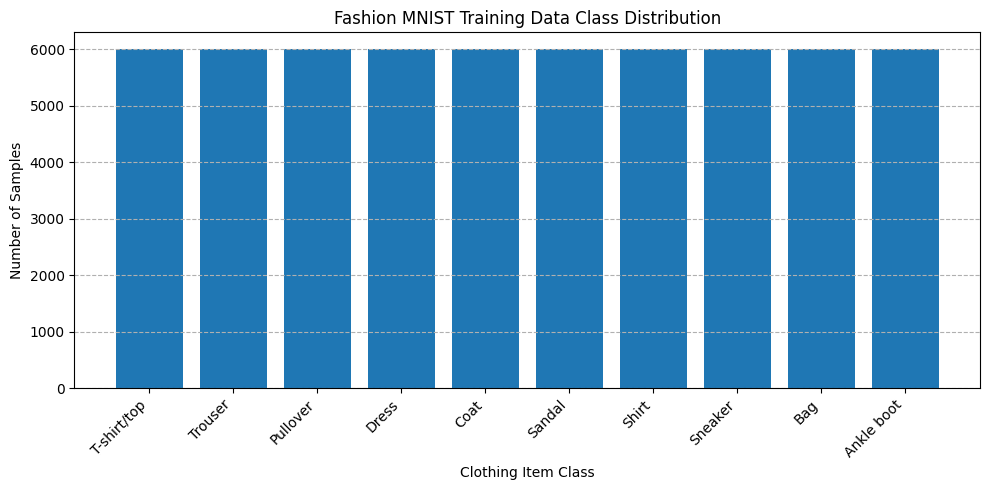


Class Counts:
Class 0 (T-shirt/top): 6000 samples
Class 1 (Trouser): 6000 samples
Class 2 (Pullover): 6000 samples
Class 3 (Dress): 6000 samples
Class 4 (Coat): 6000 samples
Class 5 (Sandal): 6000 samples
Class 6 (Shirt): 6000 samples
Class 7 (Sneaker): 6000 samples
Class 8 (Bag): 6000 samples
Class 9 (Ankle boot): 6000 samples


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class names for better visualization
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# The original integer labels are in y_train
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

plt.figure(figsize=(10, 5))
plt.bar(class_names, counts)
plt.title('Fashion MNIST Training Data Class Distribution')
plt.xlabel('Clothing Item Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("\nClass Counts:")
for i, count in enumerate(counts):
    print(f"Class {i} ({class_names[i]}): {count} samples")

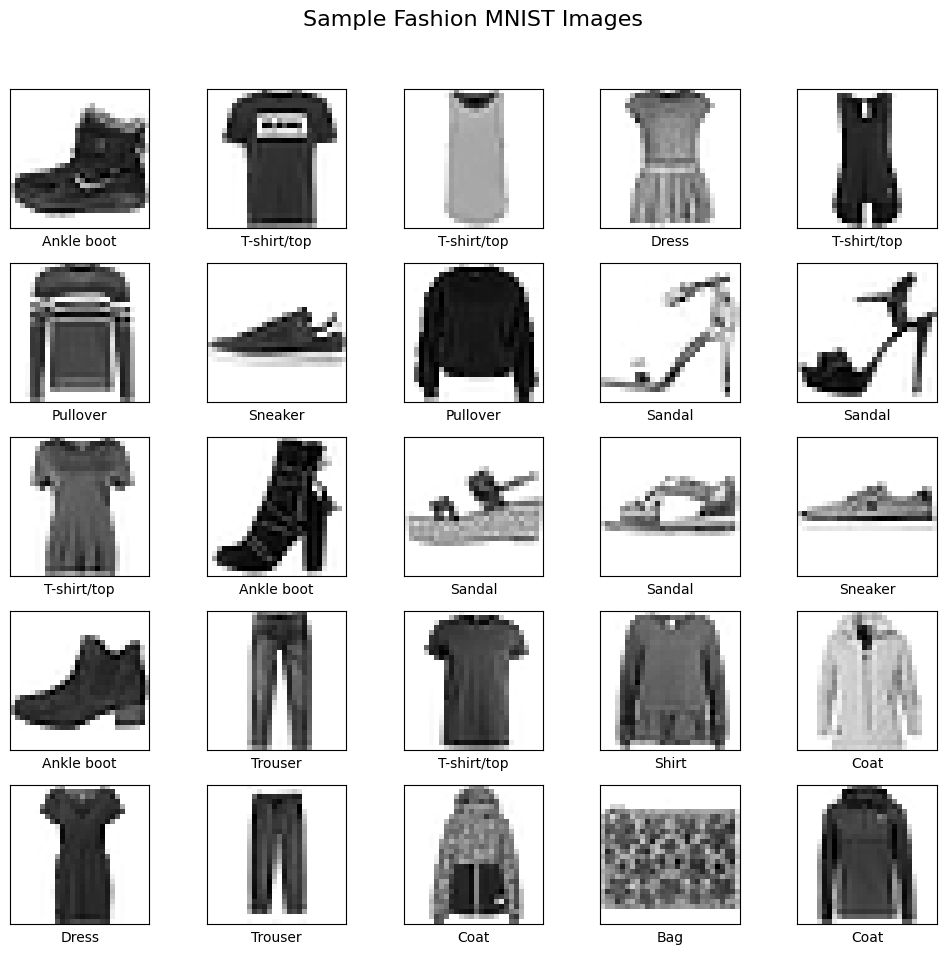

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    # Create 5x5 grid of subplots
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # The image data is the original (28, 28) X_train, not the flattened data
    plt.imshow(X_train[i], cmap=plt.cm.binary)

    # Get the class name for the label (from the original y_train integer labels)
    label = class_names[y_train[i]]
    plt.xlabel(label)

plt.suptitle('Sample Fashion MNIST Images', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

# Model Implementation
### Build two architecture templates: shallow and deep
### Apply three activation functions (ReLU, Sigmoid, Tanh)
### Train six total models (2 architectures × 3 activations)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Function to create a shallow model with a given activation function
def build_shallow_model(activation_function):
    model = Sequential()
    model.add(Dense(128, input_shape=(784,), activation=activation_function))  # Hidden layer with 128 units
    model.add(Dense(10, activation='softmax'))  # Output layer (10 classes)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to create a deep model with a given activation function
def build_deep_model(activation_function):
    model = Sequential()
    model.add(Dense(256, input_shape=(784,), activation=activation_function))  # First hidden layer
    model.add(Dense(128, activation=activation_function))  # Second hidden layer
    model.add(Dense(64, activation=activation_function))  # Third hidden layer
    model.add(Dense(10, activation='softmax'))  # Output layer (10 classes)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
# List of activation functions to test
activations = ['relu', 'sigmoid', 'tanh']

# Train shallow and deep models with each activation function
results = {}

# Train shallow models
for activation in activations:
    print(f"Training Shallow Model with {activation} activation...")
    model = build_shallow_model(activation)
    history = model.fit(X_train_flat, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_flat, y_test_cat), verbose=2)
    results[f"shallow_{activation}"] = history.history

# Train deep models
for activation in activations:
    print(f"Training Deep Model with {activation} activation...")
    model = build_deep_model(activation)
    history = model.fit(X_train_flat, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_flat, y_test_cat), verbose=2)
    results[f"deep_{activation}"] = history.history


Training Shallow Model with relu activation...
Epoch 1/10
1875/1875 - 8s - 4ms/step - accuracy: 0.8231 - loss: 0.5014 - val_accuracy: 0.8492 - val_loss: 0.4212
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8645 - loss: 0.3756 - val_accuracy: 0.8617 - val_loss: 0.3941
Epoch 3/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8770 - loss: 0.3361 - val_accuracy: 0.8646 - val_loss: 0.3723
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8853 - loss: 0.3129 - val_accuracy: 0.8728 - val_loss: 0.3521
Epoch 5/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8910 - loss: 0.2945 - val_accuracy: 0.8744 - val_loss: 0.3482
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8964 - loss: 0.2790 - val_accuracy: 0.8741 - val_loss: 0.3530
Epoch 7/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9004 - loss: 0.2669 - val_accuracy: 0.8825 - val_loss: 0.3304
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9043 - loss: 0.2582 - val_accuracy: 0.8801 - val_loss: 0.3472
Epoch 9/10
1875/1875 - 7s - 4ms/step - accuracy: 

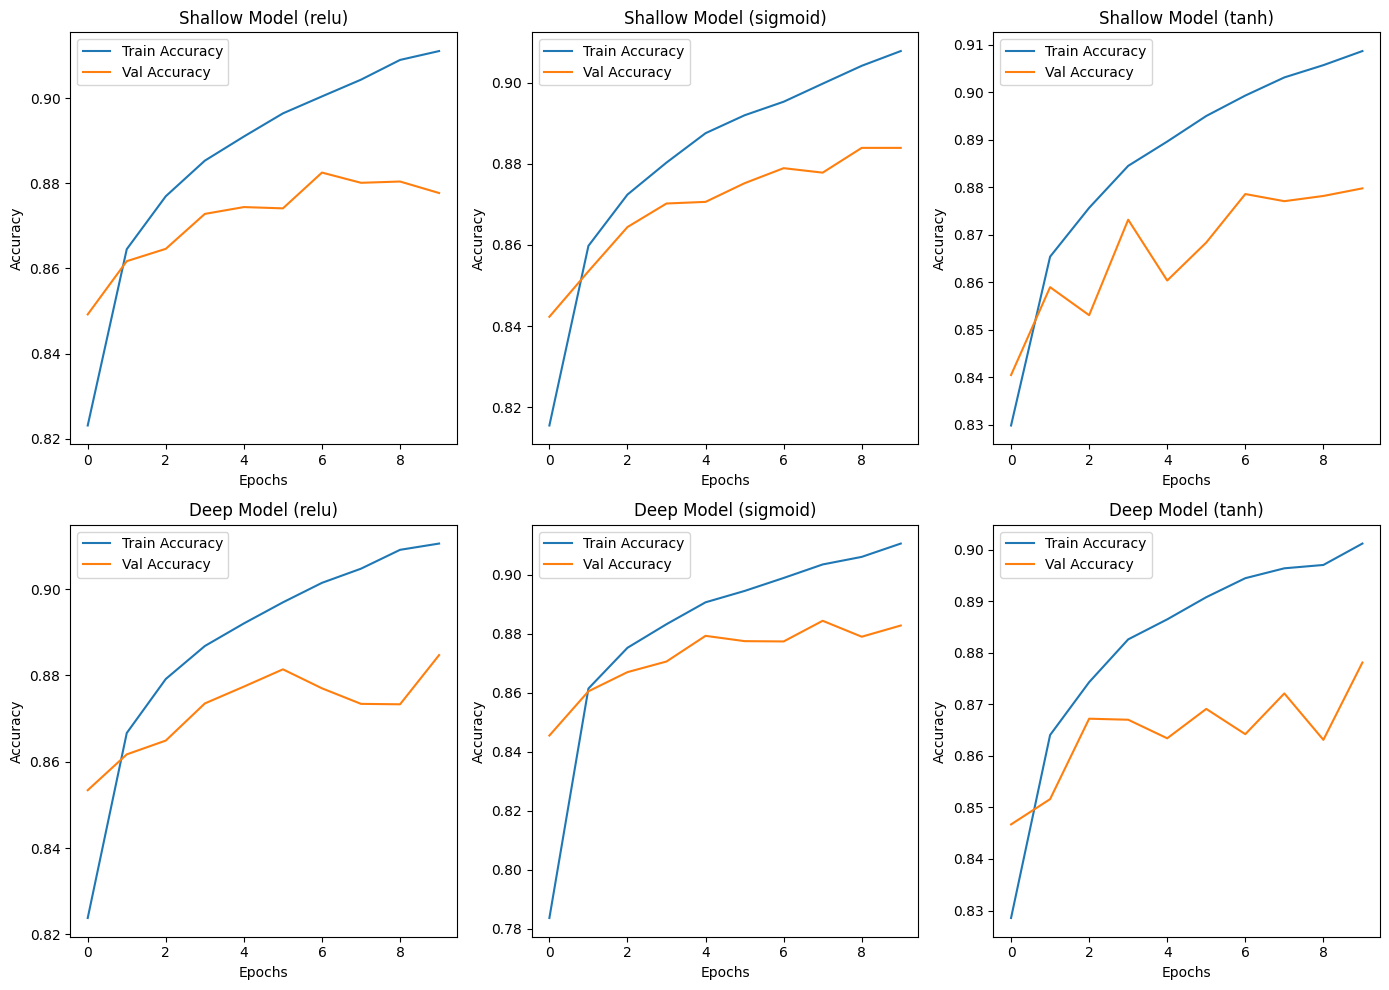

In [8]:
# Plot the results for comparison
plt.figure(figsize=(14, 10))

# Shallow model results
for activation in activations:
    plt.subplot(2, 3, activations.index(activation) + 1)
    plt.plot(results[f"shallow_{activation}"]['accuracy'], label='Train Accuracy')
    plt.plot(results[f"shallow_{activation}"]['val_accuracy'], label='Val Accuracy')
    plt.title(f"Shallow Model ({activation})")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

# Deep model results
for activation in activations:
    plt.subplot(2, 3, activations.index(activation) + 4)
    plt.plot(results[f"deep_{activation}"]['accuracy'], label='Train Accuracy')
    plt.plot(results[f"deep_{activation}"]['val_accuracy'], label='Val Accuracy')
    plt.title(f"Deep Model ({activation})")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


# Evaluation & Visualization
### Accuracy and loss curves
### Confusion matrix and classification report

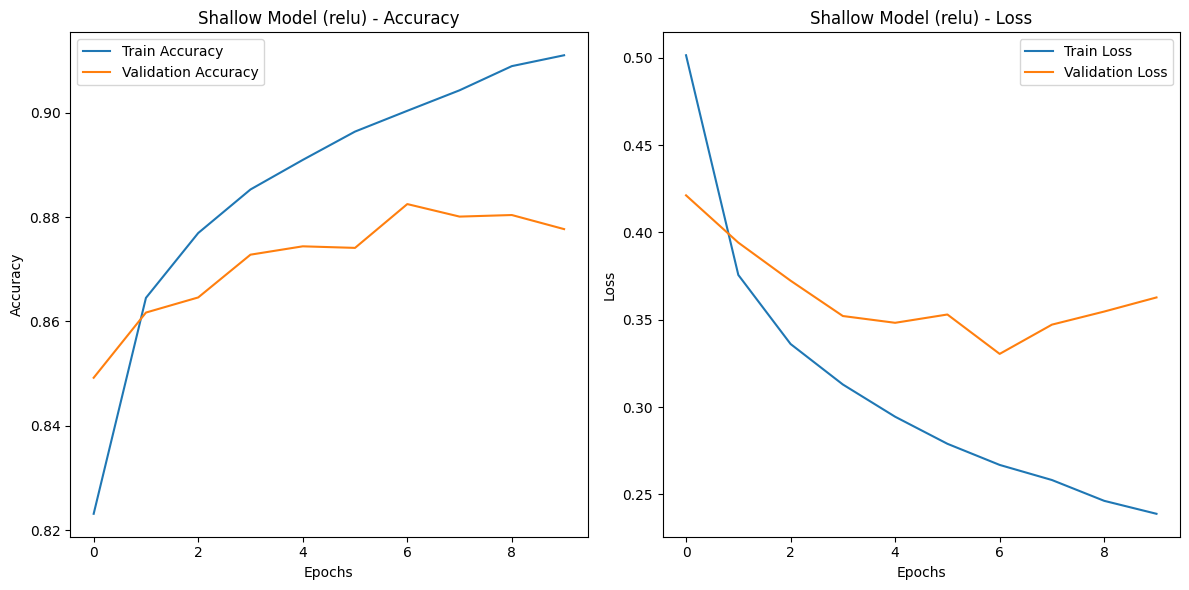

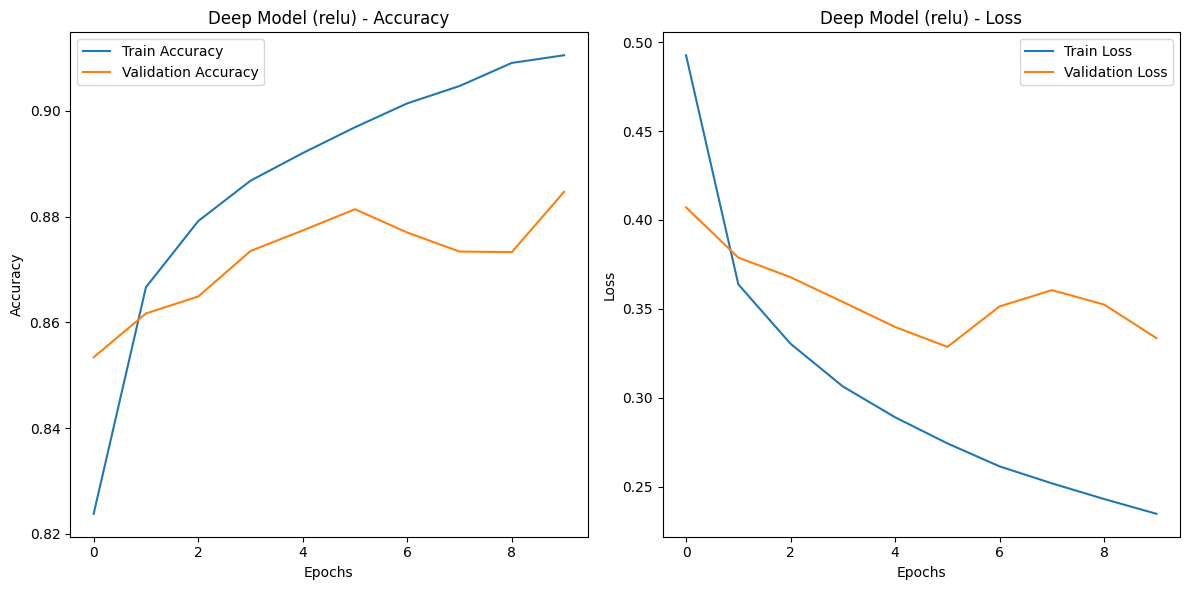

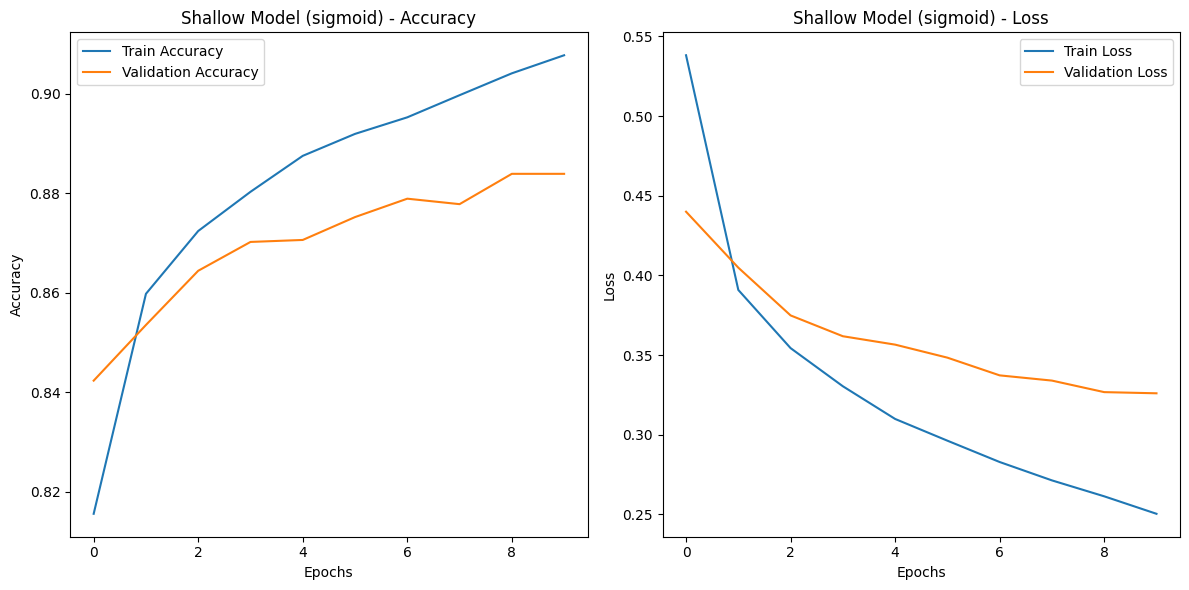

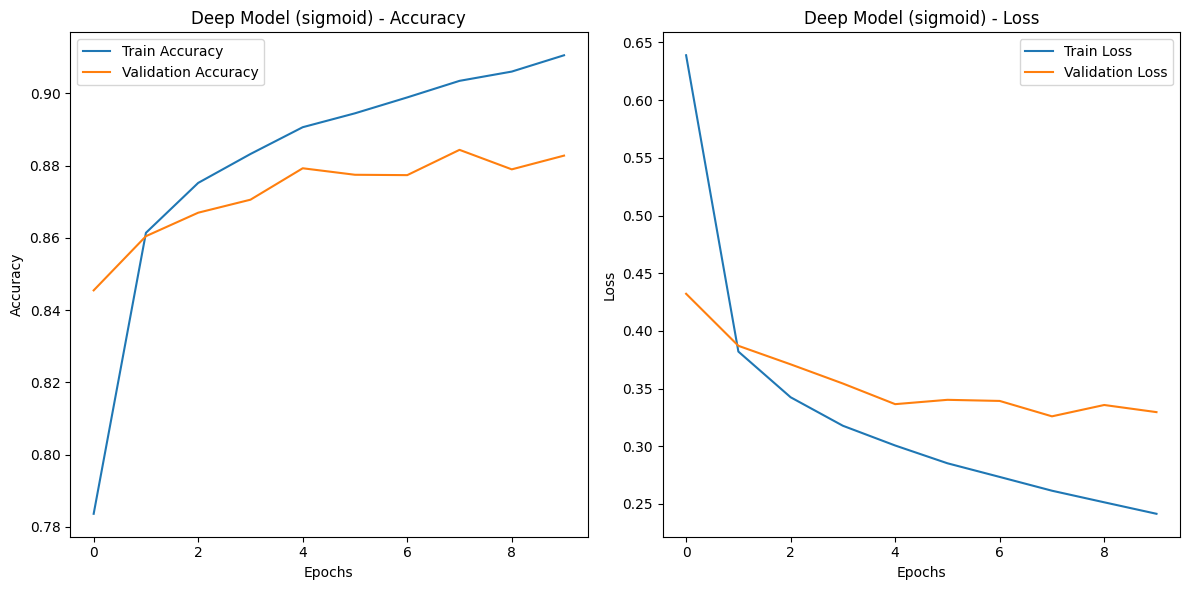

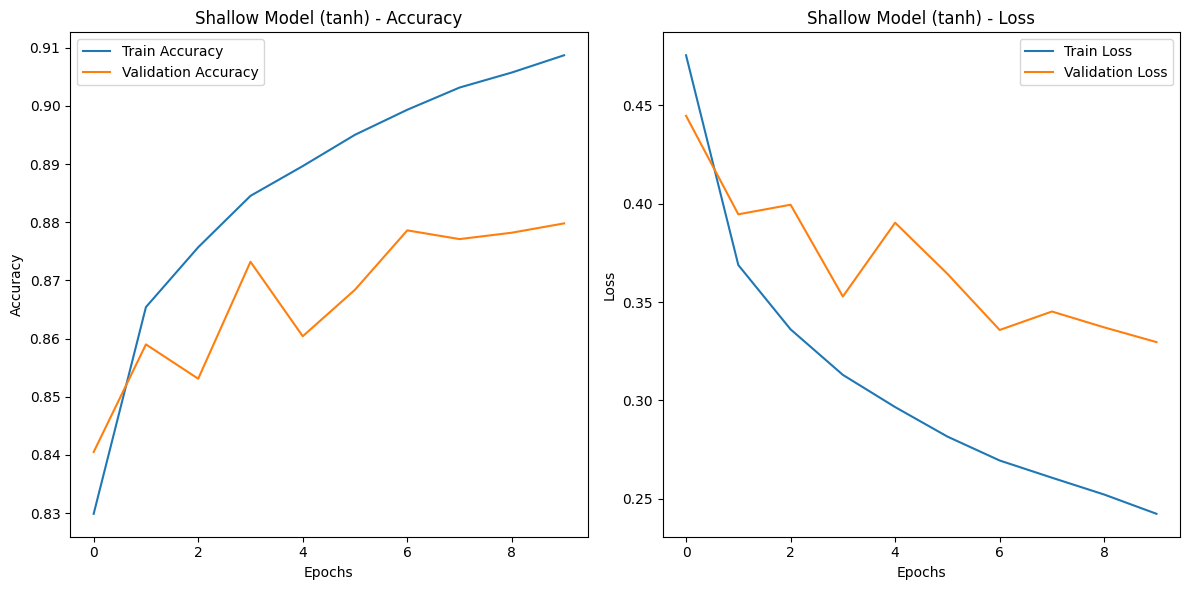

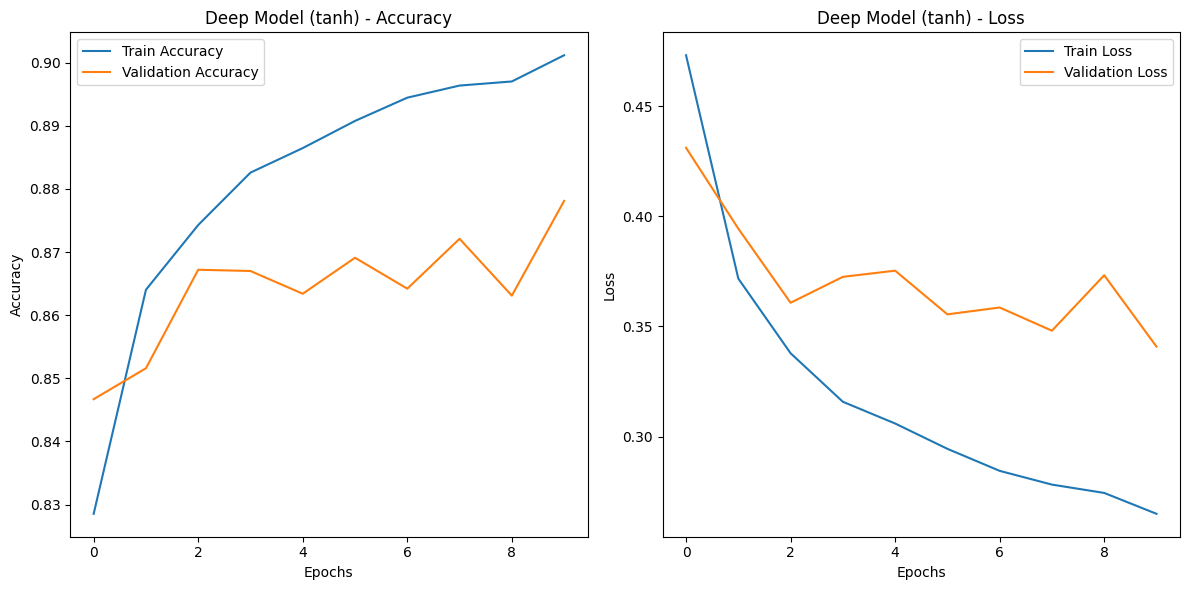

In [10]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss curves from the history dictionary
def plot_accuracy_loss(history_dict, model_name):
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['accuracy'], label='Train Accuracy')
    plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['loss'], label='Train Loss')
    plt.plot(history_dict['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# For each model in results, plot the accuracy and loss curves
for activation in activations:
    # Shallow Models
    plot_accuracy_loss(results[f"shallow_{activation}"], f"Shallow Model ({activation})")
    # Deep Models
    plot_accuracy_loss(results[f"deep_{activation}"], f"Deep Model ({activation})")



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8245 - loss: 0.4962 - val_accuracy: 0.8409 - val_loss: 0.4319
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8639 - loss: 0.3757 - val_accuracy: 0.8622 - val_loss: 0.3815
Epoch 3/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8776 - loss: 0.3358 - val_accuracy: 0.8613 - val_loss: 0.3823
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8836 - loss: 0.3140 - val_accuracy: 0.8707 - val_loss: 0.3626
Epoch 5/10
1875/1875 - 7s - 4ms/step - accuracy: 0.8912 - loss: 0.2941 - val_accuracy: 0.8775 - val_loss: 0.3424
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8952 - loss: 0.2826 - val_accuracy: 0.8697 - val_loss: 0.3624
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8996 - loss: 0.2687 - val_accuracy: 0.8750 - val_loss: 0.3419
Epoch 8/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9044 - loss: 0.2567 - val_accuracy: 0.8807 - val_loss: 0.3371
Epoch 9/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9079 - loss: 0.2465 - val_accuracy: 0.8839 -

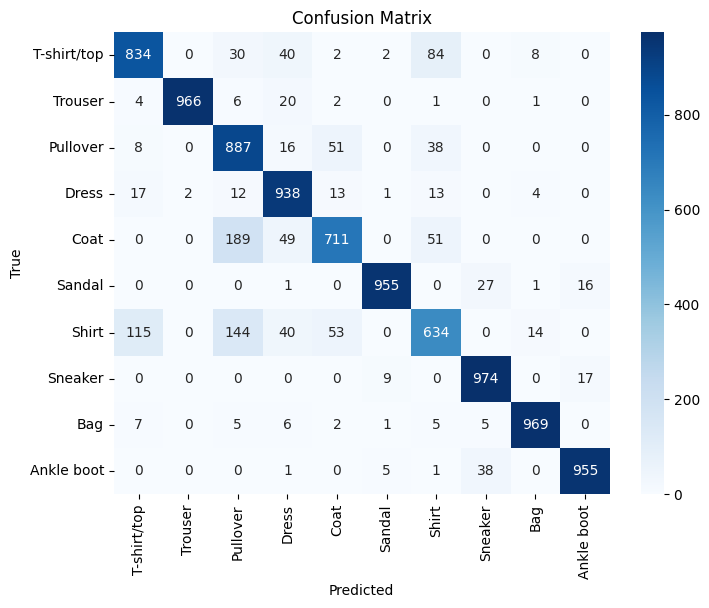

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.70      0.89      0.78      1000
       Dress       0.84      0.94      0.89      1000
        Coat       0.85      0.71      0.78      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.77      0.63      0.69      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Choose a model (e.g., the Shallow ReLU model) to evaluate
best_model = build_shallow_model('relu')
best_model.fit(X_train_flat, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_flat, y_test_cat), verbose=2)

# Predictions
y_pred = np.argmax(best_model.predict(X_test_flat), axis=1)  # Get predicted class labels

# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(np.argmax(y_test_cat, axis=1), y_pred, target_names=class_names)
print("Classification Report:\n", report)


In [ ]:
for activation in activations:
    # Shallow models
    best_shallow_model = build_shallow_model(activation)
    best_shallow_model.fit(X_train_flat, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_flat, y_test_cat), verbose=2)
    y_pred_shallow = np.argmax(best_shallow_model.predict(X_test_flat), axis=1)
    print(f"\nConfusion Matrix for Shallow Model ({activation}):")
    cm_shallow = confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred_shallow)
    sns.heatmap(cm_shallow, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix (Shallow {activation})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(f"Classification Report for Shallow Model ({activation}):")
    print(classification_report(np.argmax(y_test_cat, axis=1), y_pred_shallow, target_names=class_names))

    # Deep models
    best_deep_model = build_deep_model(activation)
    best_deep_model.fit(X_train_flat, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_flat, y_test_cat), verbose=2)
    y_pred_deep = np.argmax(best_deep_model.predict(X_test_flat), axis=1)
    print(f"\nConfusion Matrix for Deep Model ({activation}):")
    cm_deep = confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred_deep)
    sns.heatmap(cm_deep, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix (Deep {activation})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(f"Classification Report for Deep Model ({activation}):")
    print(classification_report(np.argmax(y_test_cat, axis=1), y_pred_deep, target_names=class_names))


# Reflection

#Shallow Model vs. Deep Model:

##Accuracy:

Shallow Model (ReLU): 91.1% (Final validation accuracy)

Deep Model (ReLU): 91.05% (Final validation accuracy)

Shallow Model (Sigmoid): 90.78%

Deep Model (Sigmoid): 88.28%

Shallow Model (Tanh): 90.87%

Deep Model (Tanh): 88.81%

##Loss:

Shallow Model (ReLU): 0.2389

Deep Model (ReLU): 0.2347

Shallow Model (Sigmoid): 0.2504

Deep Model (Sigmoid): 0.2415

Shallow Model (Tanh): 0.2424

Deep Model (Tanh): 0.2650

#Shallow vs Deep:

The shallow model with ReLU activation performs slightly better in terms of both accuracy (91.1% vs. 91.05%) and loss (0.2389 vs. 0.2347). However, the performance difference is very small. This suggests that the deeper architecture doesn’t offer much advantage for this particular dataset. In general, deep models tend to perform better for more complex tasks, but fashion MNIST is fairly simple, so the shallow model can get almost the same performance as the deeper model.

##Activation Functions:

ReLU: The shallow model with ReLU consistently provides the best performance in both accuracy and loss. This is often the case because ReLU is more effective at reducing the vanishing gradient problem and allows for faster convergence during training.

Sigmoid: The performance of the shallow model with Sigmoid activation is slightly lower than ReLU but still performs quite well.

Tanh: Tanh performs similarly to Sigmoid but has a slightly worse outcome in the deep model. Tanh, while useful in some contexts, can suffer from the vanishing gradient problem, which makes it less effective compared to ReLU for deep networks.

#Evaluation Metrics

###Accuracy:

A high accuracy of 88-91% for most models indicates that the models are performing reasonably well. Accuracy is a great metric when the data is balanced, but it can be misleading when class imbalances are present.

###Precision:

High precision values, particularly for classes like Trouser (1.00), Sandal (0.98), and Sneaker (0.93), show that the model is good at correctly identifying positive instances of these classes.

###Recall:

Recall values are especially important for evaluating how well the model is detecting instances of each class. For example, Shirt has a low recall (0.63), indicating that many shirts are not being identified correctly by the model.

###F1-Score:

F1-scores are typically used when precision and recall are equally important. Trouser (0.98), Sandal (0.97), and Sneaker (0.95) have high F1-scores, meaning the model performs well on these classes.

Shirt and Coat have lower F1-scores, which suggests room for improvement in detecting these classes.

#Suggested Improvements:
#A. Addressing Model Performance-

Increase Model Complexity:

For further iprovements, data scientists can increase the depth of the model, but given that a shallow model already performs nearly as well as a deep one, this might not yield significant improvements.

Data Augmentation:

Data augmentation can help improve recall for underperforming classes (e.g., Shirt and Coat). Augmenting the dataset by rotating, flipping, zooming, and shifting images can create more variety in the training data, helping the model generalize better to unseen images.

Class Weights or Oversampling:

Applying class weights or using oversampling techniques like SMOTE could help the model focus more on these classes.

Hyperparameter Tuning:

Learning rate: Optimizing the learning rate (possibly using learning rate schedules or search algorithms like grid search) could improve convergence speed and final performance.

Batch Size: Experimenting with different batch sizes might improve training dynamics.

#B. Advanced Techniques:

Transfer Learning:

Using pre-trained models (like ResNet or VGG) and fine-tuning them on Fashion MNIST could potentially improve performance, especially for more complex tasks.

Ensemble Learning:

Combining predictions from multiple models (e.g., shallow + deep + different activations) can reduce bias and improve overall prediction accuracy, especially for challenging classes.

Regularization:

Adding regularization techniques like Dropout or L2 regularization can help avoid overfitting, especially with deep models, and improve generalization.

Normalization Layers:

Using Batch Normalization between layers can help accelerate training and improve model stability, especially for deeper networks.

Experiment with Other Activations:

If ReLU works well, that’s great, but one could experiment with advanced activations like Leaky ReLU, ELU (Exponential Linear Unit), or even Swish to see if they provide a performance boost.

Conclusion:

The shallow model with ReLU seems to perform slightly better than the deep model and works well with this dataset. ReLU is the best activation for this task, but experimenting with data augmentation, class balancing, and transfer learning could further enhance performance. The classification report and confusion matrix show in detail how the model is handling each class, which will helps to target specific improvements.